In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import files
file=files.upload()

Saving Cardiotocographic.csv to Cardiotocographic.csv


# Data Cleaning and Preparation

In [3]:
data=pd.read_csv('Cardiotocographic.csv')

In [4]:
data.head()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,73.0,0.5,43.0,2.4,64.0,0.999926,2.0
1,132.000000,0.006380,0.0,0.006380,0.003190,0.0,0.0,17.0,2.1,0.0,10.4,130.0,0.000000,1.0
2,133.000000,0.003322,0.0,0.008306,0.003322,0.0,0.0,16.0,2.1,0.0,13.4,130.0,0.000000,1.0
3,134.000000,0.002561,0.0,0.007742,0.002561,0.0,0.0,16.0,2.4,0.0,23.0,117.0,1.000000,1.0
4,131.948232,0.006515,0.0,0.008143,0.000000,0.0,0.0,16.0,2.4,0.0,19.9,117.0,1.000000,1.0


In [5]:
data.shape

(2126, 14)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LB        2105 non-null   float64
 1   AC        2106 non-null   float64
 2   FM        2126 non-null   float64
 3   UC        2126 non-null   float64
 4   DL        2126 non-null   float64
 5   DS        2105 non-null   float64
 6   DP        2105 non-null   float64
 7   ASTV      2126 non-null   float64
 8   MSTV      2126 non-null   float64
 9   ALTV      2126 non-null   float64
 10  MLTV      2105 non-null   float64
 11  Width     2105 non-null   float64
 12  Tendency  2105 non-null   float64
 13  NSP       2105 non-null   float64
dtypes: float64(14)
memory usage: 232.7 KB


 **There are no inconsistencies in the data types. All are represented as float values**

In [7]:
data.isnull().sum().to_frame().T

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,21,20,0,0,0,21,21,0,0,0,21,21,21,21


In [8]:
# selecting rows that contain null values
data[data.isnull().any(axis=1)]

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
50,NaN,NaN,0.000000,0.008086,0.000000,NaN,NaN,29.000000,1.300000,0.000000,NaN,NaN,NaN,NaN
116,NaN,0.038567,0.000000,0.006993,0.002331,NaN,NaN,26.000000,4.300000,0.532872,NaN,NaN,NaN,NaN
126,NaN,NaN,0.000000,0.004380,0.000000,NaN,NaN,69.000000,0.300000,21.000000,NaN,NaN,NaN,NaN
201,NaN,NaN,0.016393,0.000000,0.000000,NaN,NaN,56.000000,0.500000,12.000000,NaN,NaN,NaN,NaN
566,NaN,NaN,0.000000,0.004115,0.005487,NaN,NaN,43.000000,2.500000,0.000000,NaN,NaN,NaN,NaN
574,NaN,NaN,0.000000,0.002611,0.002611,NaN,NaN,34.000000,4.900000,0.000000,NaN,NaN,NaN,NaN
603,NaN,NaN,0.006519,0.001304,0.001304,NaN,NaN,73.000000,0.700000,0.000000,NaN,NaN,NaN,NaN
935,NaN,NaN,0.000000,0.005495,0.001374,NaN,NaN,30.000000,1.251793,0.000000,NaN,NaN,NaN,NaN
936,NaN,NaN,0.000000,0.007802,0.000000,NaN,NaN,33.000000,1.000000,0.000000,NaN,NaN,NaN,NaN
1013,NaN,NaN,0.000000,0.003861,0.000000,NaN,NaN,34.000000,1.000000,0.000000,NaN,NaN,NaN,NaN


In [9]:
#imputing missing values using mean
missing_columns=['LB','AC','DS','DP','MLTV','Width','Tendency','NSP']
for column in missing_columns:
  mean=data[column].mean()
  # data[column].fillna(mean,inplace=True)
  data.fillna({column:mean},inplace=True)

In [10]:
data.isnull().sum().to_frame().T

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [11]:
#outlier detection using statistical methods (z-score, IQR)
#using IQR
Q1=data.quantile(0.25)
Q3=data.quantile(0.75)
IQR=Q3-Q1
upper_bound=Q3+(1.5*IQR)
lower_bound=Q1-(1.5*IQR)

outlier=data[(data>upper_bound)|(data<lower_bound)].any(axis=1)

In [12]:
data[outlier]

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,73.0,0.5,43.000000,2.4,64.000000,0.999926,2.000000
3,134.0,0.002561,0.000000,0.007742,0.002561,0.0,0.000000,16.0,2.4,0.000000,23.0,117.000000,1.000000,1.000000
5,134.0,0.001116,0.000000,0.010493,0.009444,0.0,0.002099,26.0,5.9,0.000000,0.0,150.000000,0.000000,3.000000
6,134.0,0.001403,0.000000,0.012623,0.008415,0.0,0.002805,29.0,6.3,0.000000,0.0,150.000000,0.000000,-1.025988
7,122.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,83.0,0.5,6.000000,15.6,69.920261,1.000000,3.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.0,0.000000,0.961268,0.007426,0.000000,0.0,0.000000,79.0,0.2,25.000000,7.2,40.000000,0.000000,2.000000
2122,140.0,0.000775,0.000000,0.006979,0.000000,0.0,0.000000,78.0,0.4,22.000000,7.1,66.000000,1.000000,2.000000
2123,140.0,0.000980,0.000000,0.006863,0.000000,0.0,0.000000,79.0,0.4,20.000000,6.1,67.000000,1.000000,1.990464
2124,140.0,0.000679,0.000000,0.006110,0.000000,0.0,0.000000,78.0,0.4,27.000000,7.0,66.000000,1.000000,2.000000


<Axes: >

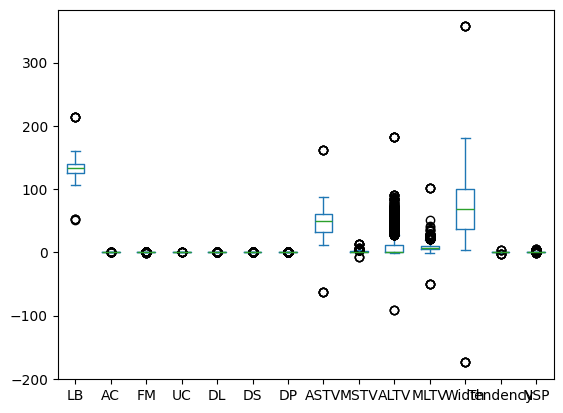

In [13]:
#outliers using visualizations (box plot)
data.plot(kind='box')

In [14]:
#standardizing
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
scaled_data=sc.fit_transform(data)

In [15]:
scaled_data=pd.DataFrame(scaled_data,columns=data.columns)
scaled_data.head()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,-1.190150,-0.736771,-0.146533,-1.314683,-0.567147,-0.017819,-0.209658,1.382490,-0.736672,1.543111,-0.761055,-0.150536,1.064275,1.084546
1,-0.119839,0.723411,-0.146533,0.595558,0.387339,-0.017819,-0.209658,-1.594721,0.626938,-0.485186,0.273534,1.394802,-0.492581,-0.474846
2,-0.030646,0.023639,-0.146533,1.172279,0.426977,-0.017819,-0.209658,-1.647886,0.626938,-0.485186,0.661505,1.394802,-0.492581,-0.474846
3,0.058546,-0.150642,-0.146533,1.003470,0.199131,-0.017819,-0.209658,-1.647886,0.882615,-0.485186,1.903012,1.090417,1.064390,-0.474846
4,-0.124456,0.754327,-0.146533,1.123674,-0.567147,-0.017819,-0.209658,-1.647886,0.882615,-0.485186,1.502109,1.090417,1.064390,-0.474846


<Axes: >

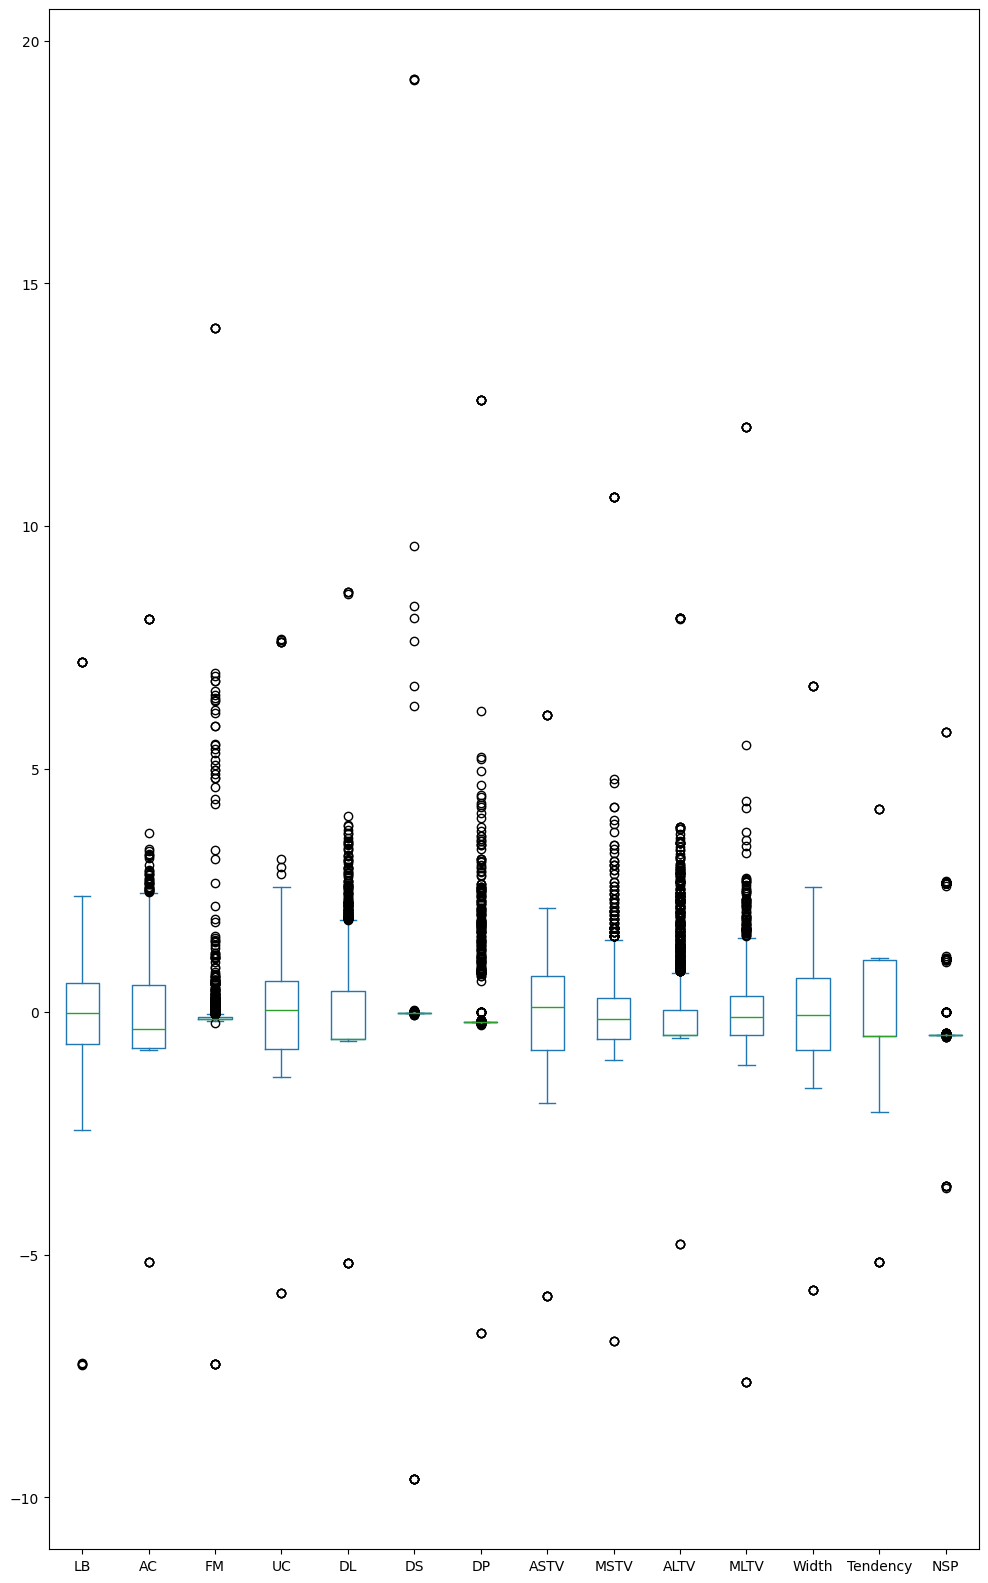

In [16]:
# plt.figure(figsize=(20,20))
scaled_data.plot(kind='box',figsize=(12,20))

**As it is a cardiographic dataset any outliers may represent abnormalities of an individual.**

---
Given this is a cardiographic dataset, outliers may represent unusual or abnormal fetal heart rate patterns, fetal movements, or uterine contractions, which could be critical indicators of several health concerns.

# Statistical Summary

In [17]:
data.describe()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,133.343598,0.003219,0.009894,0.004391,0.001895,0.000003,0.000175,46.995984,1.364378,10.285964,8.284887,70.429260,0.316371,1.304507
std,11.214328,0.004370,0.067540,0.003340,0.003343,0.000141,0.000836,18.813973,1.173632,21.205041,7.734356,42.719161,0.642424,0.641426
min,51.842487,-0.019284,-0.480634,-0.014925,-0.015393,-0.001353,-0.005348,-63.000000,-6.600000,-91.000000,-50.700000,-174.000000,-3.000000,-1.025988
25%,126.000000,0.000000,0.000000,0.001851,0.000000,0.000000,0.000000,32.000000,0.700000,0.000000,4.600000,37.000000,0.000000,1.000000
50%,133.000000,0.001668,0.000000,0.004484,0.000000,0.000000,0.000000,49.000000,1.200000,0.000000,7.500000,68.000000,0.000000,1.000000
75%,140.000000,0.005606,0.002567,0.006536,0.003289,0.000000,0.000000,61.000000,1.700000,11.000000,10.800000,100.000000,1.000000,1.000000
max,214.000000,0.038567,0.961268,0.030002,0.030769,0.002706,0.010695,162.000000,13.800000,182.000000,101.400000,357.000000,3.000000,5.000000


In [18]:
#no. of unique values in each column
for col in data.columns:
  print(col,':',data[col].nunique())

LB : 154
AC : 1068
FM : 776
UC : 1364
DL : 822
DS : 115
DP : 265
ASTV : 183
MSTV : 165
ALTV : 195
MLTV : 352
Width : 262
Tendency : 112
NSP : 112


# Data Visualizations

In [ ]:
#histogram
#outlier
#boxplot
#bar charts, pie charts
#scatter plots, correlation
#pair plot, violin plot

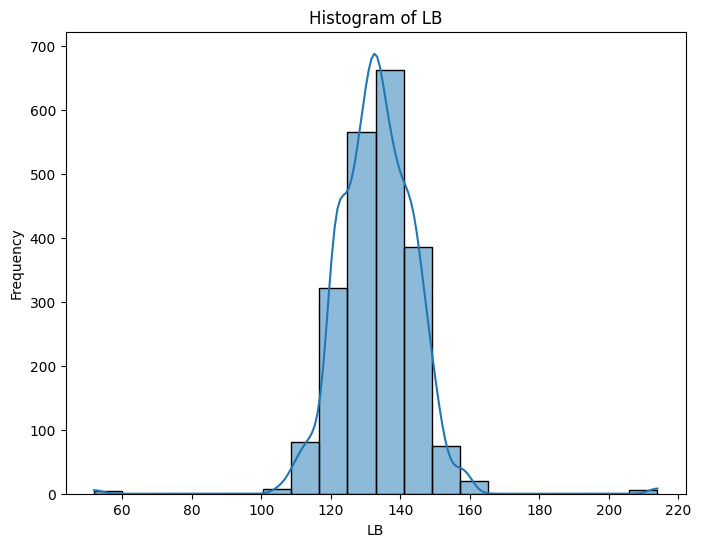

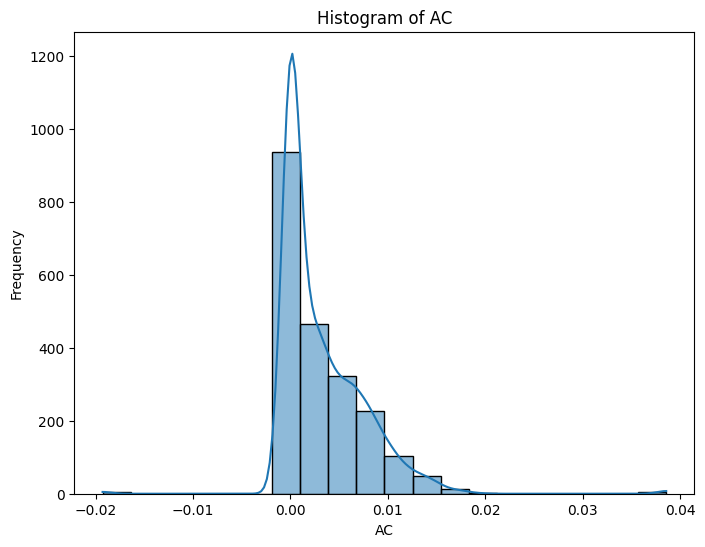

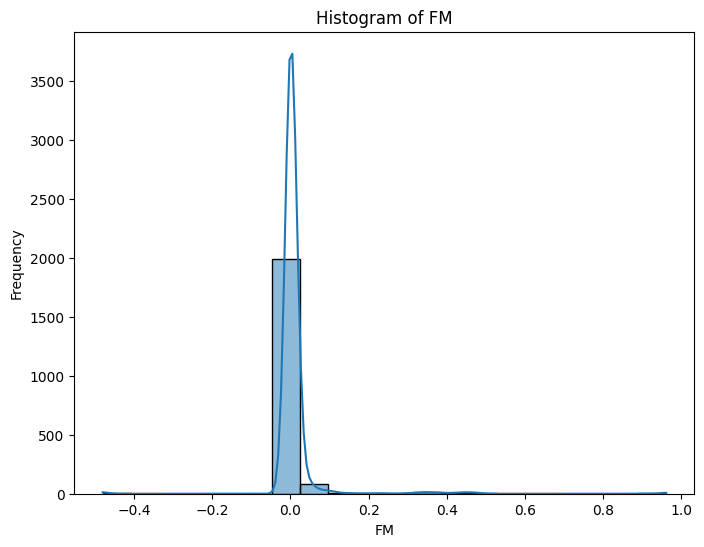

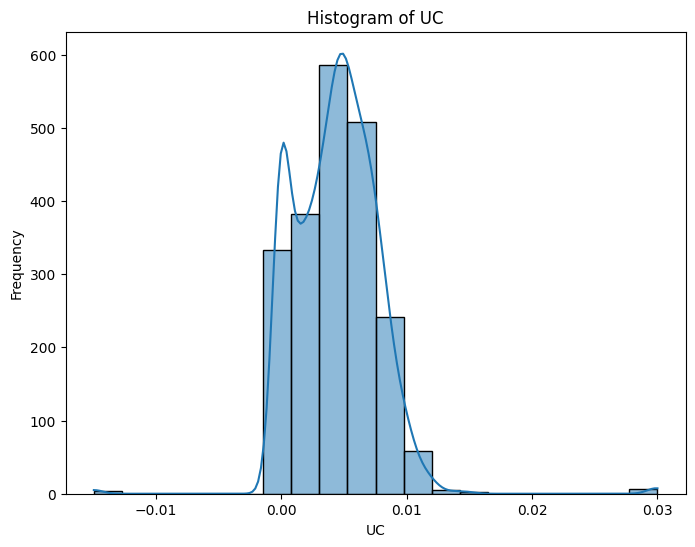

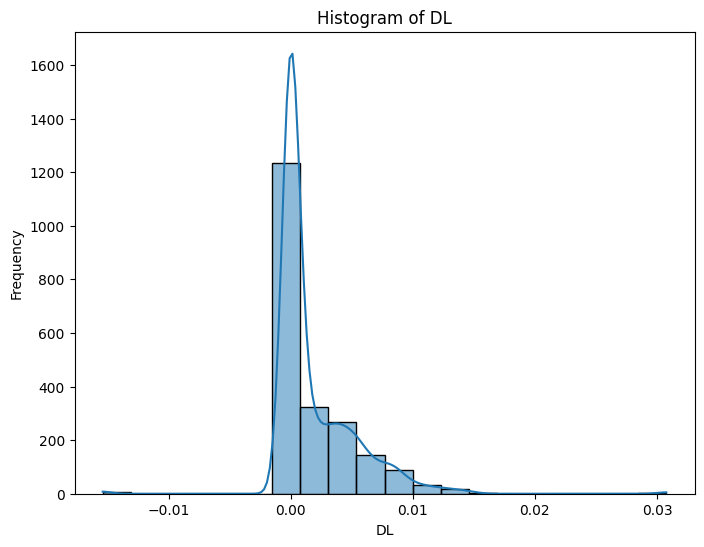

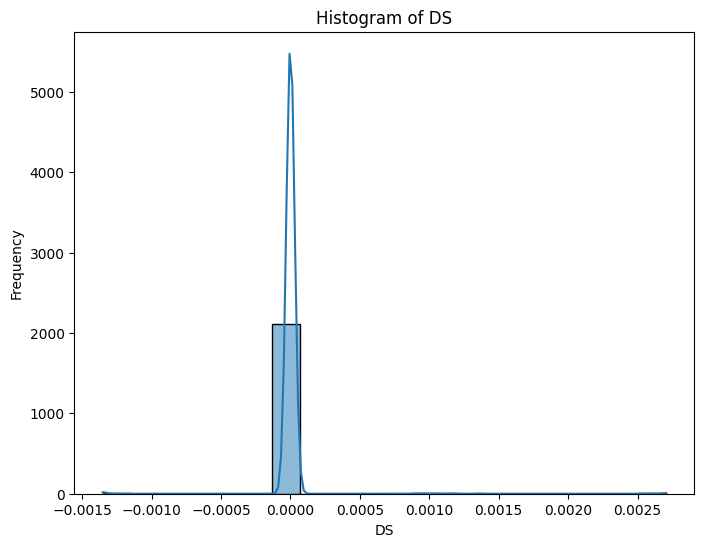

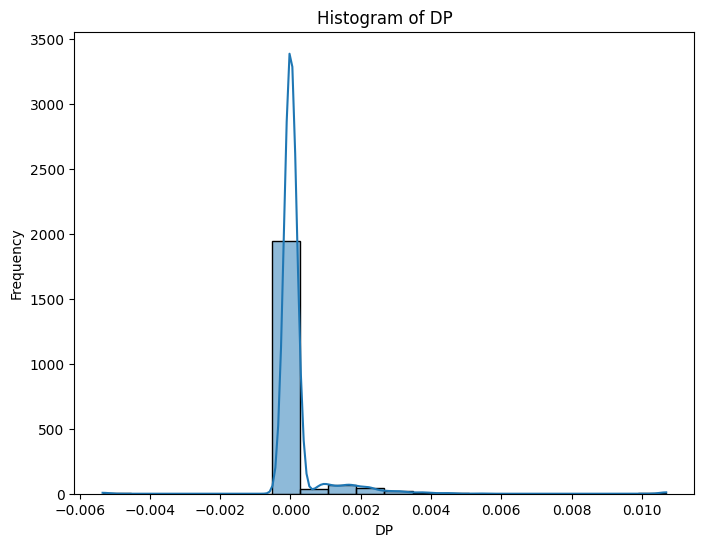

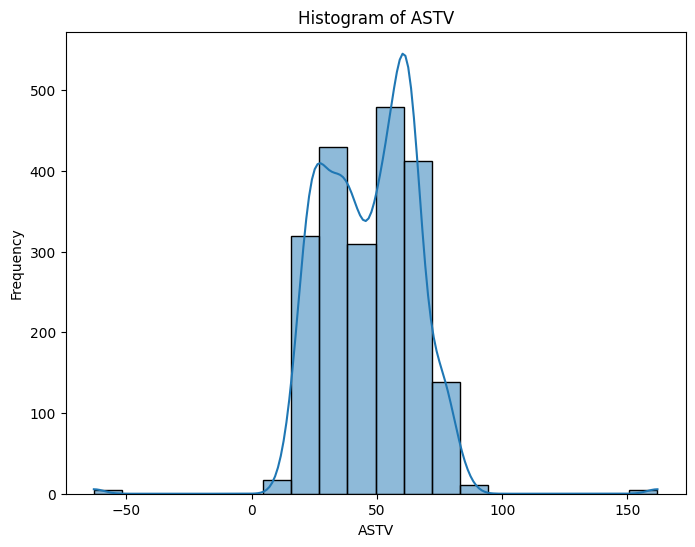

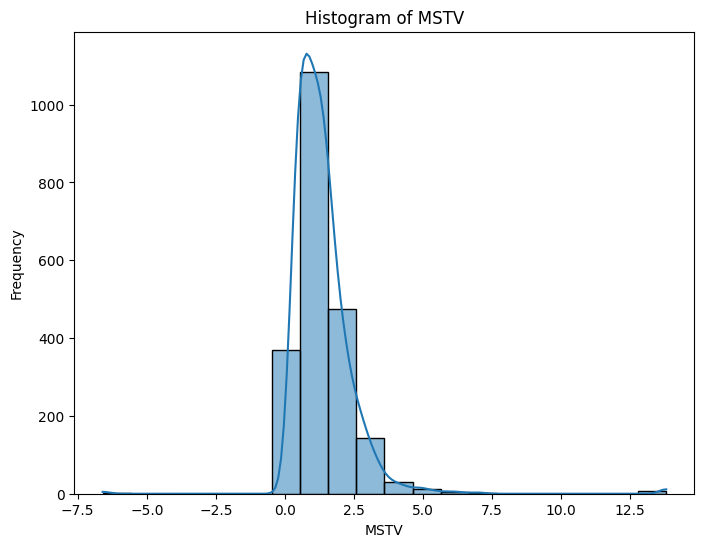

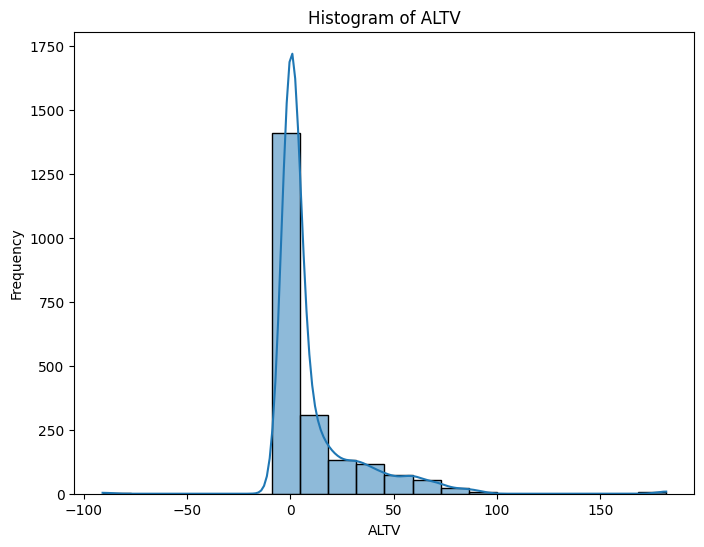

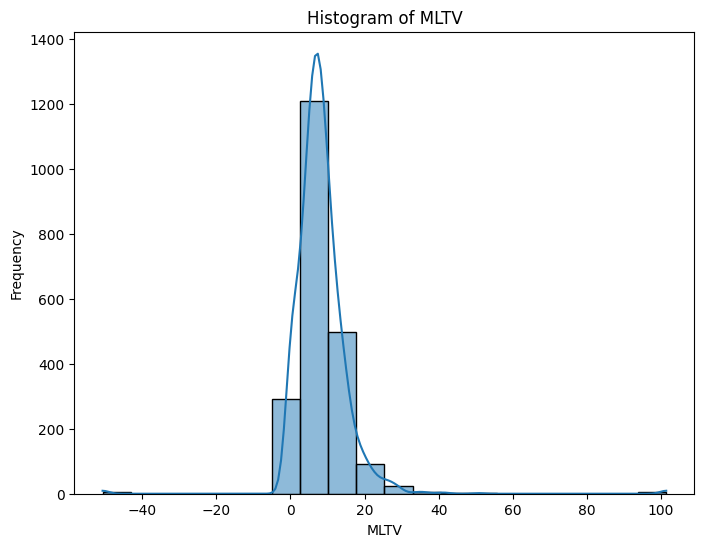

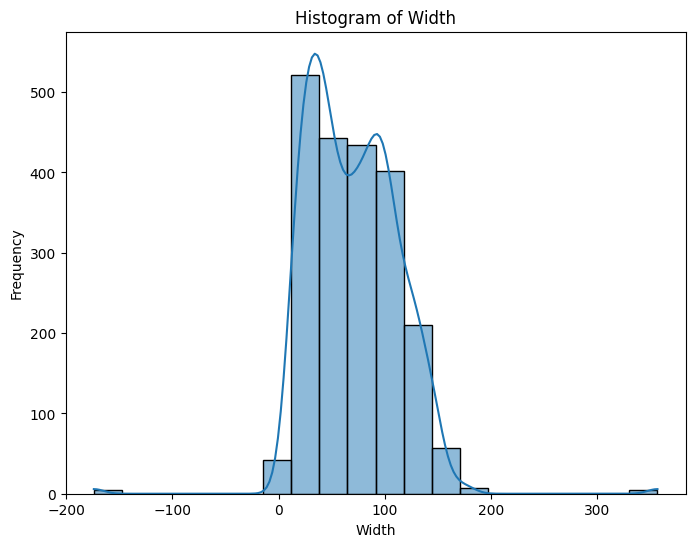

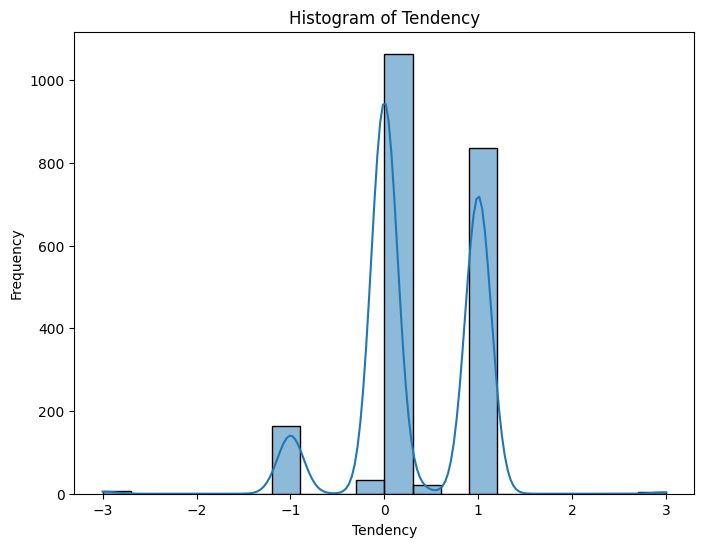

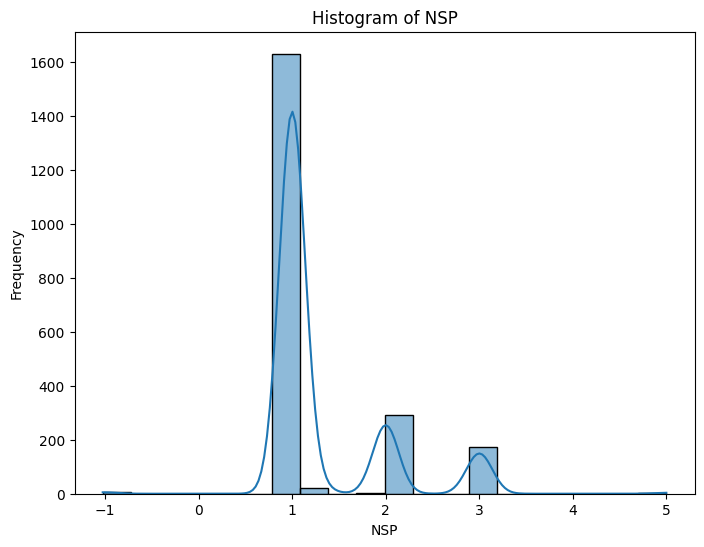

In [24]:
# Histograms
# numerical_variables = ['LB', 'AC', 'FM', 'UC', 'DL', 'DS', 'DP', 'ASTV', 'MSTV', 'ALTV', 'MLTV', 'Width', 'Tendency', 'NSP']
for var in data.columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(data[var], kde=True, bins=20)
    plt.title(f'Histogram of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')
    # plt.show()

Text(0.5, 1.0, 'Correlation Heatmap')

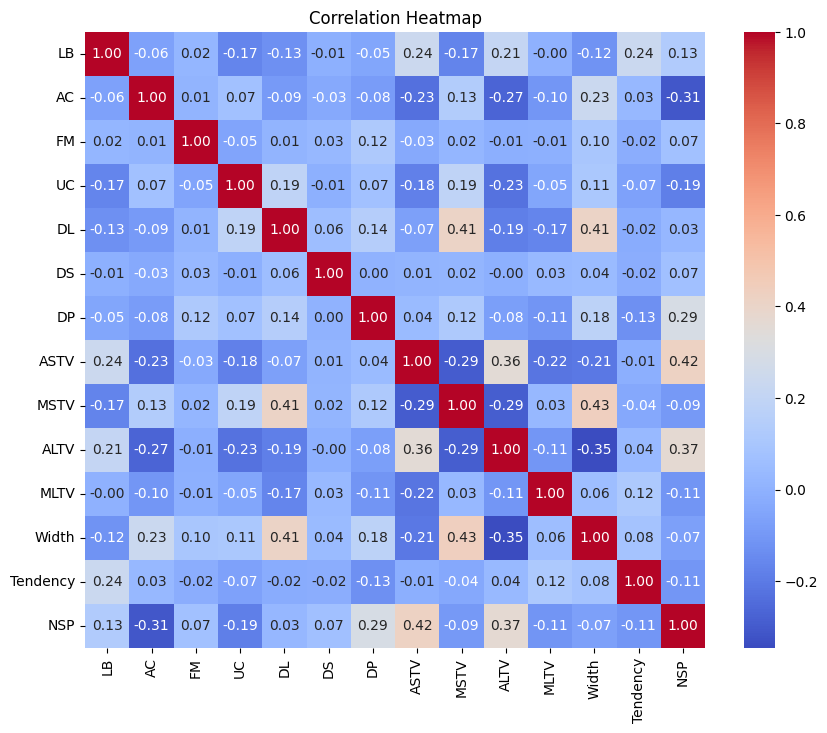

In [25]:
#heatmap corr
plt.figure(figsize=(10, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')

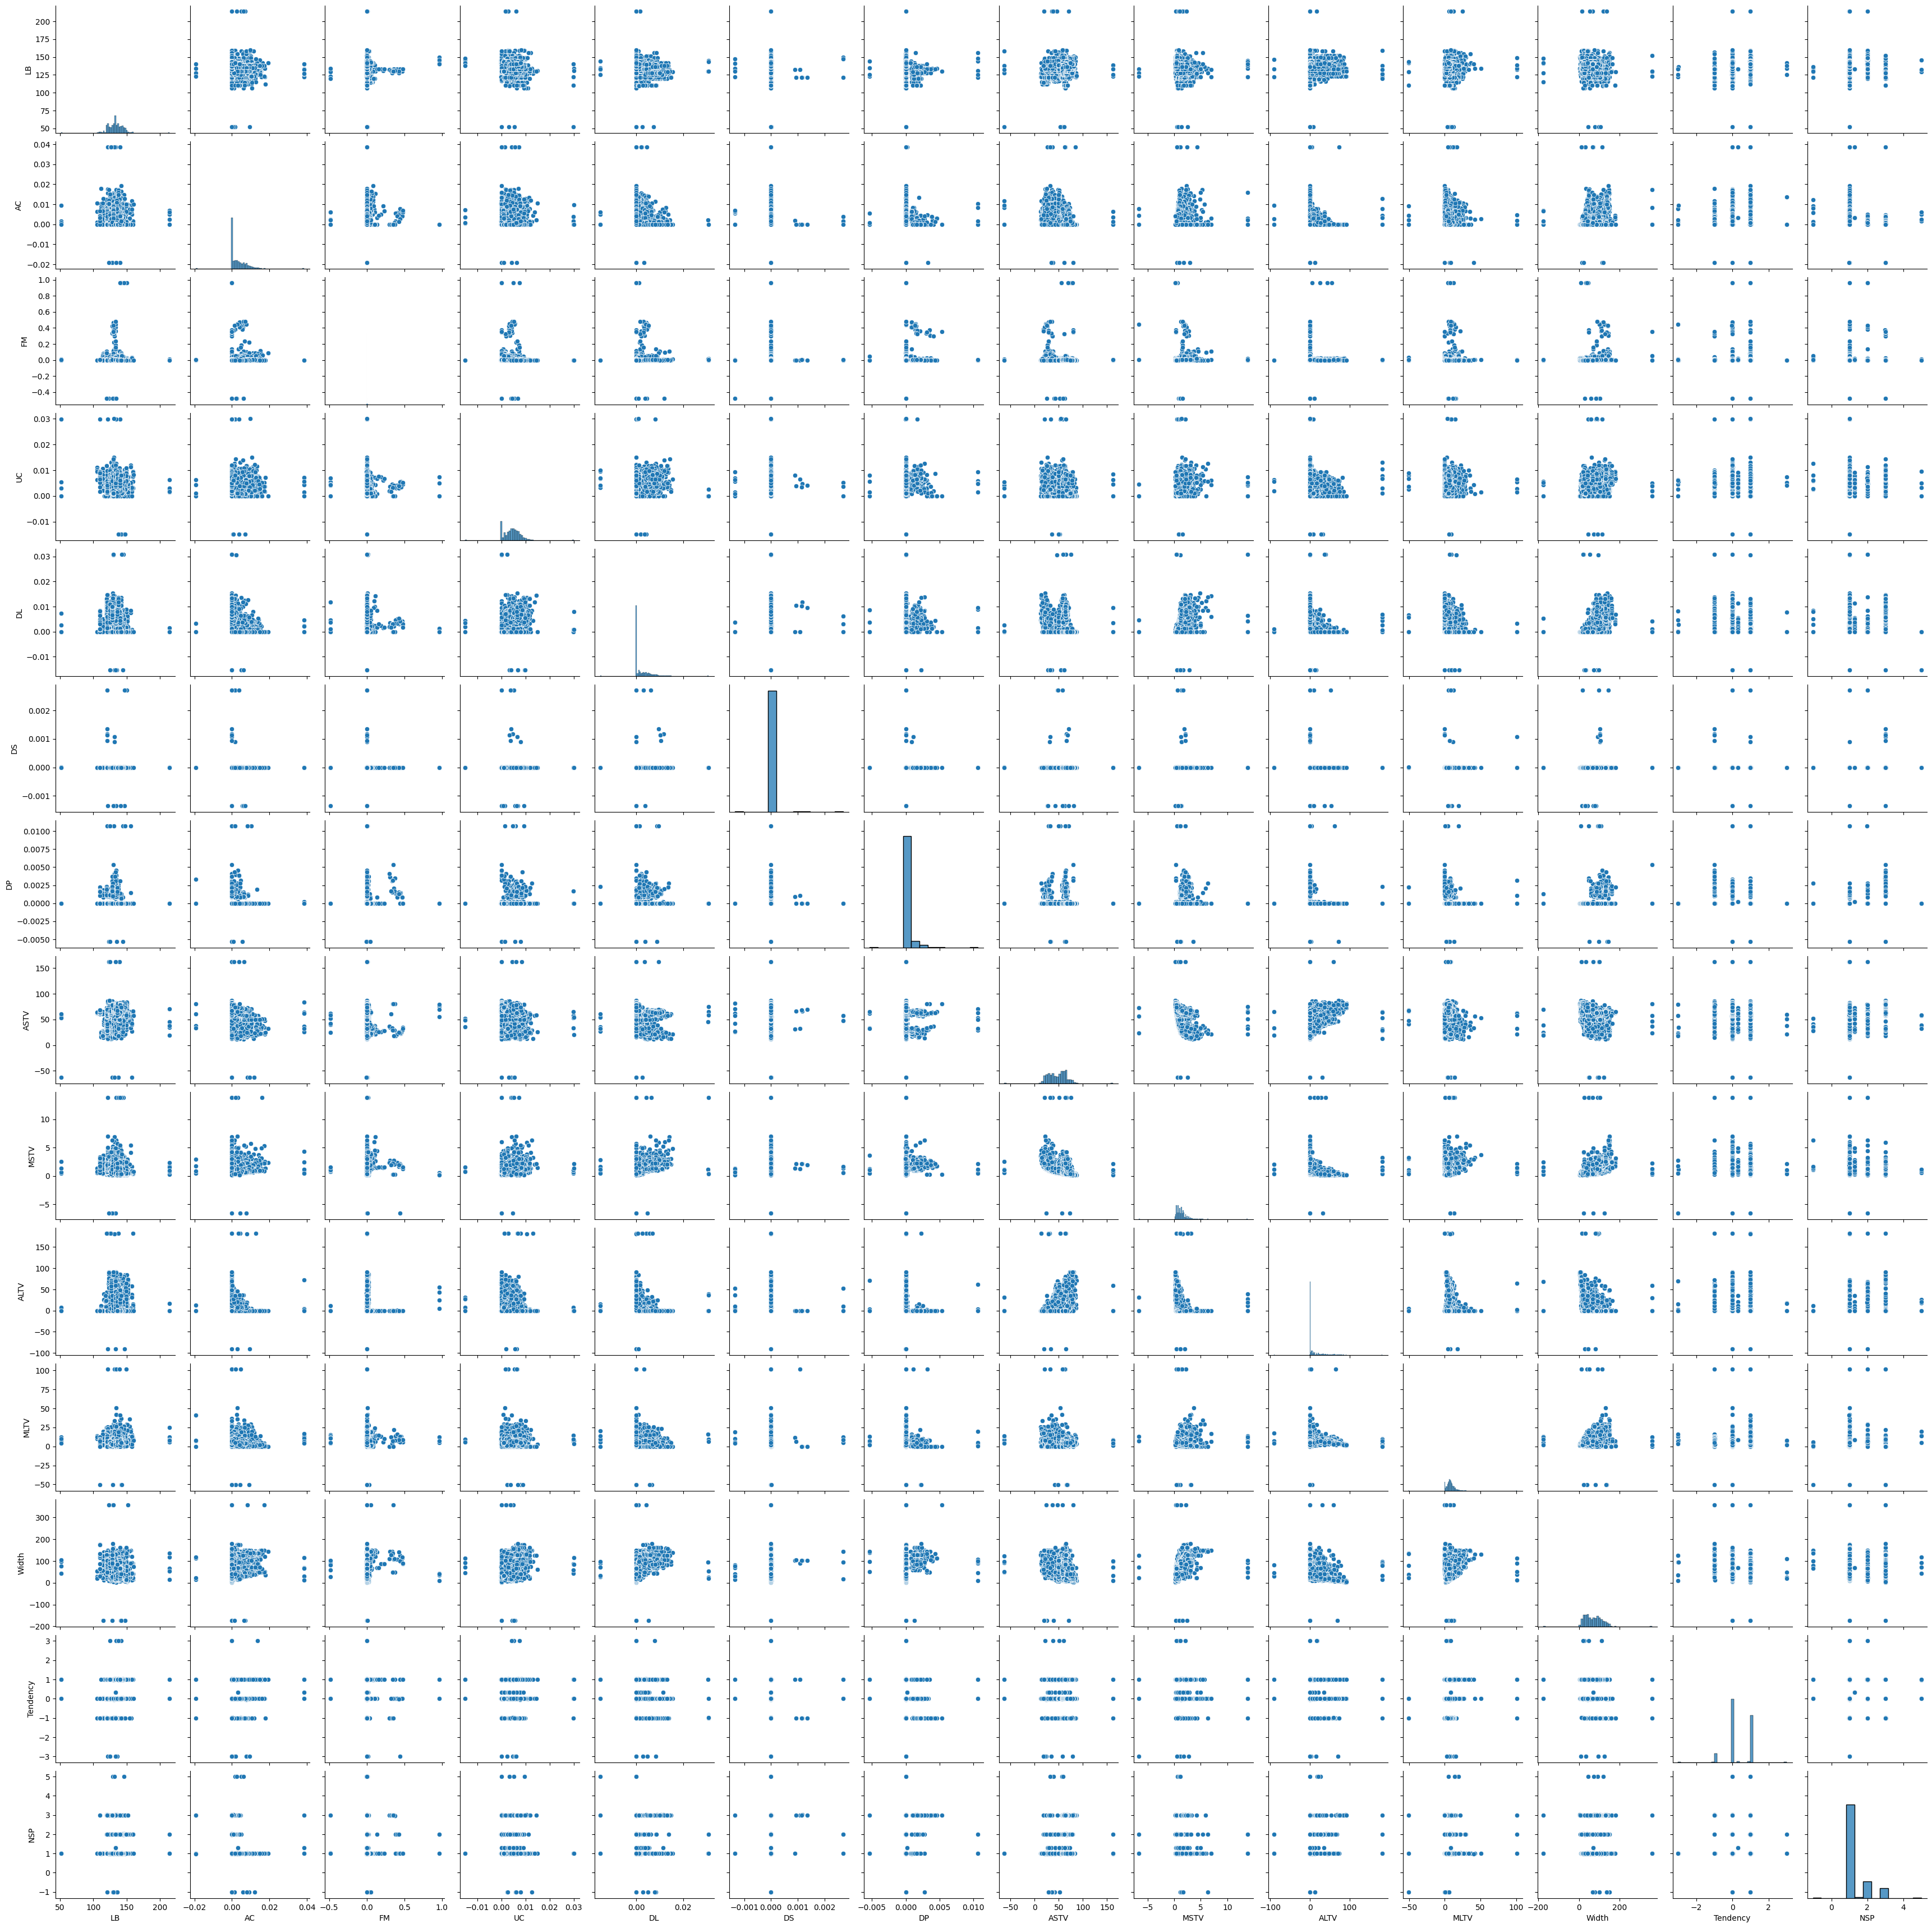

In [19]:
sns.pairplot(data)

<Axes: >

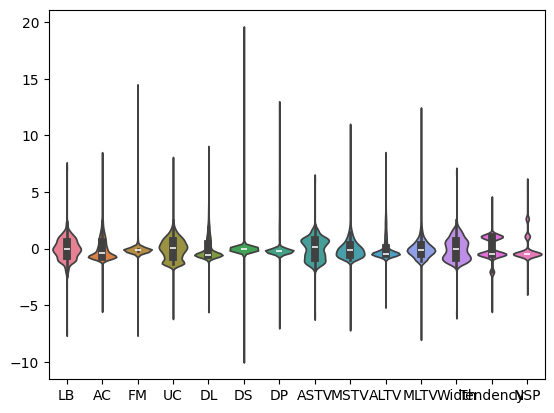

In [21]:
sns.violinplot(scaled_data)

<Axes: >

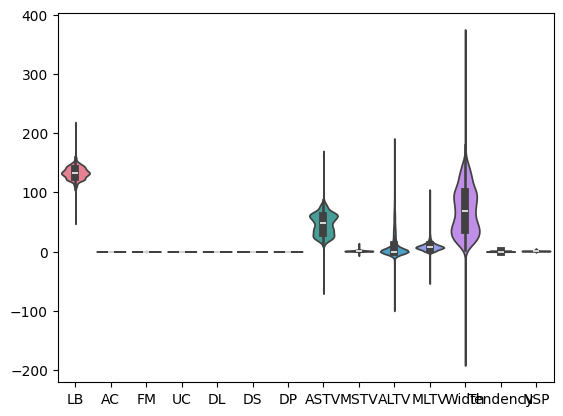

In [22]:
sns.violinplot(data)